# Проверка моделей, которые обучались на текстах разной предобработки

In [38]:
!pip install import-ipynb
%cd '/content/drive/My Drive/QA_training/notebooks'
import import_ipynb
from my_functions import *

/content/drive/My Drive/QA_training/notebooks


## Ананлиз символов, которые чаще всего встречаются перед и после ответа:

In [ ]:
 next_index = []
 end_index = []
 previous_index = []
 for answer, context in zip(answers, contexts):
    if type(answer['text']) == str:
                gold_text = answer['text']
                start_idx = context.find(gold_text) 
                end_idx = start_idx + len(gold_text)

                end_index.append(context[end_idx-1])

                if end_idx == len(context):
                  next_index.append('end_string')
                else:
                  next_index.append(context[end_idx])
                if start_idx-2 < 0:
                  previous_index.append('begin_string')
                else:
                   previous_index.append(context[start_idx-2])

In [ ]:
import collections
counter_next_end=collections.Counter(next_index)
counter_start = collections.Counter(previous_index)
counter_end = collections.Counter(end_index)

In [ ]:
counter_start.most_common(30)

In [ ]:
counter_next_end.most_common(10)

In [ ]:
counter_end.most_common()

In [ ]:
clear_answers = [answ for answ in answers if type(answ['text']) == str]
len(answers), len(clear_answers)

## Оценка моделей

In [3]:
bert_names = ['initial_bert', 'main_punct_bert', 'main_punct_bert', 'only_words_bert']
model_paths = ['/content/drive/My Drive/QA_training/models/initial_bert_model_2',
               '/content/drive/My Drive/QA_training/models/main_punct_plus_bert_model_2',
               '/content/drive/My Drive/QA_training/models/main_punct_bert_model_2',
               '/content/drive/My Drive/QA_training/models/only_words_bert_model_2']
m_l = len(model_paths) 

In [4]:
initial_datasets_paths = ['/content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev.csv',
                          '/content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev.csv',
                          '/content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_dev.csv',
                          '/content/drive/My Drive/QA_training/datasets_csv/ms_only_words_dev.csv']

In [5]:
folder_paths = ['/content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev',
                '/content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev',
                '/content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_dev',
                '/content/drive/My Drive/QA_training/datasets_csv/ms_only_words_dev']

In [6]:
dataset_names = ['begin_of_text', 'after_point', 'after_comma', 'middle_of_sentense', 'no_answer']
d_l = len(dataset_names)

In [6]:
table_f1 = np.zeros((4, 5), dtype=object)

In [12]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
for i in range(m_l):
    model =  BertForQuestionAnswering.from_pretrained(model_paths[i])
    trainer = Trainer(
                model=model,                         # the instantiated 🤗 Transformers model to be trained
                #args=training_args,                  # training arguments, defined above
                #train_dataset=train_dataset,         # training dataset
                #eval_dataset=val_dataset,            # evaluation dataset
            )
    for j in range(d_l):
        print(f"Step {i*d_l + j +1} out of {m_l*d_l}")
        
        path = folder_paths[i] + '/' + dataset_names[j] + '.csv'
        print('Dataset path:', path)
        print('Model path:', model_paths[i])
        val_dataset, answers = prepare_and_merge_data(path, tokenizer, 'msmarco', return_answers = True)
        

        results = evaluate_score_squad(trainer, answers, tokenizer, eval_dataset = val_dataset)
        del val_dataset

        table_f1[i, j] = results['f1_mean']
        print('F1 score:', results['f1_mean'])
        
        np.save('/content/drive/My Drive/QA_training/results/text_prep_results/table_f1_v2', table_f1)


Step 1 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev/begin_of_text.csv
Model path: /content/drive/My Drive/QA_training/models/initial_bert_model_2


F1 score: 0.5815870143927521
Step 2 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev/after_point.csv
Model path: /content/drive/My Drive/QA_training/models/initial_bert_model_2
F1 score: 0.5503306720191705
Step 3 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev/after_comma.csv
Model path: /content/drive/My Drive/QA_training/models/initial_bert_model_2
F1 score: 0.5562613306970994
Step 4 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev/middle_of_sentense.csv
Model path: /content/drive/My Drive/QA_training/models/initial_bert_model_2
F1 score: 0.5620210674861664
Step 5 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev/no_answer.csv
Model path: /content/drive/My Drive/QA_training/models/initial_bert_model_2
F1 score: 0.6941879413362303
Step 5 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev

F1 score: 0.5885862919214164
Step 6 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev/after_point.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_plus_bert_model_2
F1 score: 0.5584731545581997
Step 7 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev/after_comma.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_plus_bert_model_2
F1 score: 0.556519604250704
Step 8 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev/middle_of_sentense.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_plus_bert_model_2
F1 score: 0.5671898659662605
Step 9 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_plus_dev/no_answer.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_plus_bert_model_2
F1 score: 0.6770776751765345
Step 9 out of 20
Dataset path: /content

F1 score: 0.5802859120607574
Step 10 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_dev/after_point.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_bert_model_2
F1 score: 0.5503512814342825
Step 11 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_dev/after_comma.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_bert_model_2
F1 score: 0.5544436918746743
Step 12 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_dev/middle_of_sentense.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_bert_model_2
F1 score: 0.5576741529658702
Step 13 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_main_punct_dev/no_answer.csv
Model path: /content/drive/My Drive/QA_training/models/main_punct_bert_model_2
F1 score: 0.6865833785985878
Step 13 out of 20
Dataset path: /content/drive/My Drive/QA_training/datase

F1 score: 0.565233535196493
Step 14 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_only_words_dev/after_point.csv
Model path: /content/drive/My Drive/QA_training/models/only_words_bert_model_2
F1 score: 0.5477792636862772
Step 15 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_only_words_dev/after_comma.csv
Model path: /content/drive/My Drive/QA_training/models/only_words_bert_model_2
F1 score: 0.5341751142126733
Step 16 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_only_words_dev/middle_of_sentense.csv
Model path: /content/drive/My Drive/QA_training/models/only_words_bert_model_2
F1 score: 0.5474955952424642
Step 17 out of 20
Dataset path: /content/drive/My Drive/QA_training/datasets_csv/ms_only_words_dev/no_answer.csv
Model path: /content/drive/My Drive/QA_training/models/only_words_bert_model_2
F1 score: 0.6675719717544812


In [12]:
table_f1 = np.load('/content/drive/My Drive/QA_training/results/text_prep_results/table_f1_v2.npy', allow_pickle=True)


In [13]:
col_names = ["Text beginning", 'After point', 'After comma', 'Middle of sentense', 'No answer']
row_names = ['Initial bert', 'Main punct. plus bert', 'Main punct. bert', 'Only words bert']

In [14]:
df_f1 = pd.DataFrame(data=table_f1, index = row_names, columns=col_names)

Посчитали результаты для разных частей датасета. Теперь, зная эти результаты, можно посчитать f1 для всего датасета 

In [32]:
def combine_answers(table, datasets):
    len_list = []
    for path in datasets:
        len_list.append(len(pd.read_csv(path)))
    len_list = np.array(len_list)

    answers = []
    for row in table:
        answers.append(sum(row*len_list) / sum(len_list))
    
    return np.array(answers), len_list



In [33]:
dataset_paths = ['/content/drive/My Drive/QA_training/datasets_csv/ms_initial_dev/' + name + '.csv' for name in dataset_names]
all_data_results, dataet_lens = combine_answers(table_f1, dataset_paths)
df_f1['all dataset'] = all_data_results

In [39]:
dataset_path = '/content/drive/MyDrive/QA_training/datasets_csv/ms_initial_train.csv'
df = pd.read_csv(dataset_path)
print(len(df)*2/3)

318386.6666666667


In [36]:
print("Size of text beginning:", dataet_lens[0])
print("Size of after point:", dataet_lens[1])
print("Size of after comma:", dataet_lens[2])
print("Size of middle sentense:", dataet_lens[3])
print("Size of no answer:", dataet_lens[4])
print("All size:", sum(dataet_lens))


df_f1.astype('float').round(3)


Size of text beginning: 9545
Size of after point: 7587
Size of after comma: 3763
Size of middle sentense: 27865
Size of no answer: 3682
All size: 52442


,Text beginning,After point,After comma,Middle of sentense,No answer,all dataset
Initial bert,0.582,0.550,0.556,0.562,0.694,0.573
Main punct. plus bert,0.589,0.558,0.557,0.567,0.677,0.577
Main punct. bert,0.580,0.550,0.554,0.558,0.687,0.570
Only words bert,0.565,0.548,0.534,0.547,0.668,0.558


In [37]:
df_f1.to_csv('/content/drive/My Drive/QA_training/results/text_prep_results/df_f1_v2.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

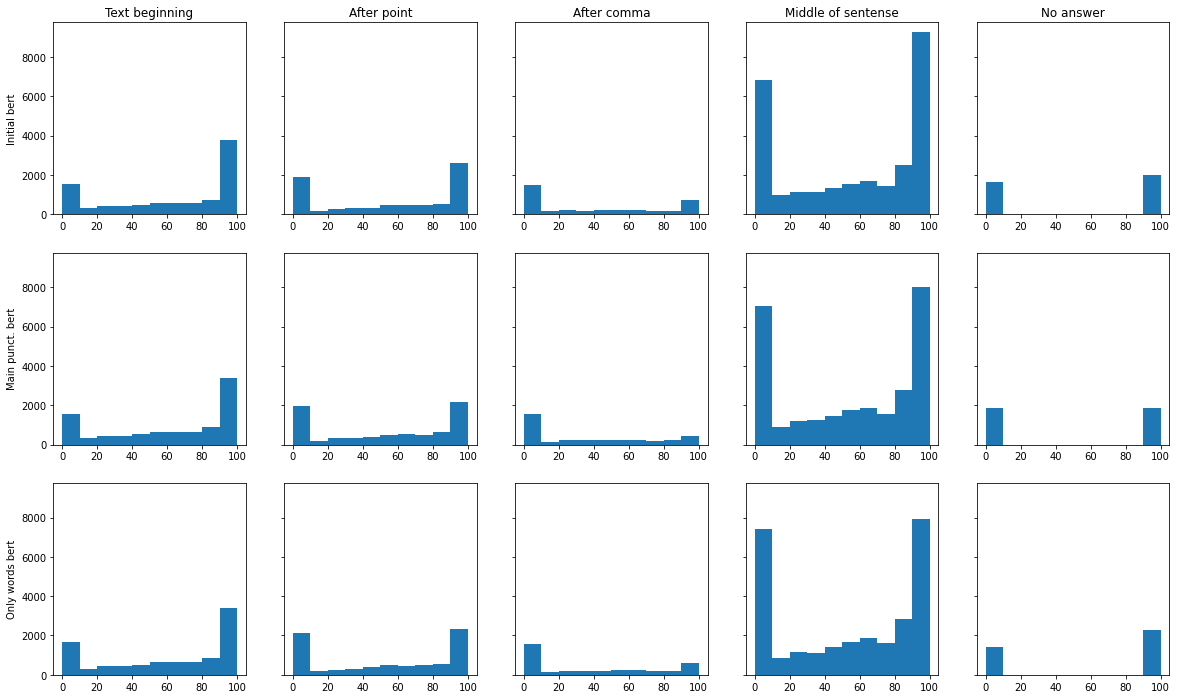

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(20, 12), sharey=True)
for i in range(3):
    for j in range(5):
      axs[i, j].hist(table_f1[i, j])

for i in range(3):
  axs[i, 0].set_ylabel(row_names[i])

for j in range(5):
  axs[0, j].set_title(col_names[j])

(array([13451.,  1659.,  2045.,  2073.,  2362.,  2817.,  2967.,  2649.,
         3989., 18430.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

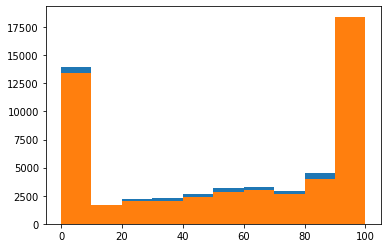

In [ ]:
plt.hist(all_dataset_data[1])
plt.hist(all_dataset_data[0])

In [ ]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [ ]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

In [ ]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
print("p-value: %f" % permutation_test(all_dataset_data[2] - all_dataset_data[1], 0., alternative='greater', 
                               max_permutations = 1000))

p-value: 0.000000
